## Initial settings

In [40]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import load_model

In [41]:
from tensorflow import keras
import tensorflow as tf

In [42]:
import sys
sys.path.append("..")
import tools as t

In [43]:
os.environ["CUDA_VISIBLE_DEVICES"] = f"{3}"

In [44]:
root_path = "/home/dg321/gitTest/PRI/irp/Ventilation/direk"

## Load data

In [45]:
train_1 = pd.read_csv("/home/dg321/gitTest/PRI/irp/Ventilation/direk/data_new/6GIC_meeting_room_sensors_2023-11-09.csv")
print(train_1.shape)

(198403, 81)


In [46]:
print(train_1.head(5))

                  time  time_sin  time_cos  Occupancy  door_gap  window_gap  \
0  2023-06-27 17:53:00 -0.999534 -0.030539        0.0       1.0         2.0   
1  2023-06-27 17:54:00 -0.999657 -0.026177        0.0       1.0         2.0   
2  2023-06-27 17:55:00 -0.999762 -0.021815        0.0       1.0         2.0   
3  2023-06-27 17:56:00 -0.999848 -0.017452        0.0       1.0         2.0   
4  2023-06-27 17:57:00 -0.999914 -0.013090        0.0       1.0         2.0   

   humidity  VOC_ppb  temperature_Main  temperature_FRT  ...  \
0      59.0    157.0             21.99              NaN  ...   
1      59.0    157.0             21.99              NaN  ...   
2      59.0    157.0             21.99              NaN  ...   
3      59.0    157.0             21.99              NaN  ...   
4      59.0    157.0             21.99              NaN  ...   

   outdoor_temperature  outdoor_humidity  outdoor_windgust  outdoor_windspeed  \
0                 15.9              83.2              19.8 

In [47]:
print(train_1["time"][0])
print(train_1["time"][158721])

2023-06-27 17:53:00
2023-10-04 22:35:00


In [48]:
train_1['time'] = pd.to_datetime(train_1['time'])

In [49]:
print(train_1.tail(5))

                      time  time_sin  time_cos  Occupancy  door_gap  \
198398 2023-10-31 19:33:00 -0.918791  0.394744        0.0       0.0   
198399 2023-10-31 19:34:00 -0.917060  0.398749        0.0       0.0   
198400 2023-10-31 19:35:00 -0.915311  0.402747        0.0       0.0   
198401 2023-10-31 19:36:00 -0.913545  0.406737        0.0       0.0   
198402 2023-10-31 19:37:00 -0.911762  0.410719        0.0       0.0   

        window_gap  humidity  VOC_ppb  temperature_Main  temperature_FRT  ...  \
198398    0.000000      49.0    119.0             22.02              NaN  ...   
198399    0.600000      49.0    112.0             22.02              NaN  ...   
198400    0.166667      49.0    112.0             22.02              NaN  ...   
198401    0.000000      49.0    112.0             22.02              NaN  ...   
198402    0.000000      49.0    112.0             22.02              NaN  ...   

        outdoor_temperature  outdoor_humidity  outdoor_windgust  \
198398             

In [50]:
print(train_1.columns)

Index(['time', 'time_sin', 'time_cos', 'Occupancy', 'door_gap', 'window_gap',
       'humidity', 'VOC_ppb', 'temperature_Main', 'temperature_FRT',
       'temperature_FRM', 'temperature_FRB', 'temperature_FMT',
       'temperature_FMM', 'temperature_FMB', 'temperature_FLT',
       'temperature_FLM', 'temperature_FLB', 'temperature_BRT',
       'temperature_BRM', 'temperature_BRB', 'temperature_BMT',
       'temperature_BMM', 'temperature_BMB', 'temperature_BLT',
       'temperature_BLM', 'temperature_BLB', 'temperature_WRB',
       'temperature_WMB', 'temperature_WLB', 'temperature_WLF',
       'temperature_DoorRT', 'temperature_BTable', 'temperature_PRUR',
       'temperature_PRUL', 'temperature_PRDR', 'temperature_PRDL',
       'temperature_PLDR', 'temperature_PLDL', 'temperature_Out', 'light_FRT',
       'light_FRM', 'light_FRB', 'light_FMT', 'light_FMM', 'light_FMB',
       'light_FLT', 'light_FLM', 'light_FLB', 'light_BRT', 'light_BRM',
       'light_BRB', 'light_BMT', 'light_BMM'

In [51]:
column_names_list = train_1.columns.tolist()

In [52]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198403 entries, 0 to 198402
Data columns (total 81 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      198403 non-null  datetime64[ns]
 1   time_sin                  198403 non-null  float64       
 2   time_cos                  198403 non-null  float64       
 3   Occupancy                 198403 non-null  float64       
 4   door_gap                  198403 non-null  float64       
 5   window_gap                198403 non-null  float64       
 6   humidity                  198403 non-null  float64       
 7   VOC_ppb                   198403 non-null  float64       
 8   temperature_Main          198403 non-null  float64       
 9   temperature_FRT           0 non-null       float64       
 10  temperature_FRM           0 non-null       float64       
 11  temperature_FRB           0 non-null       float64       
 12  te

(44180, 14)


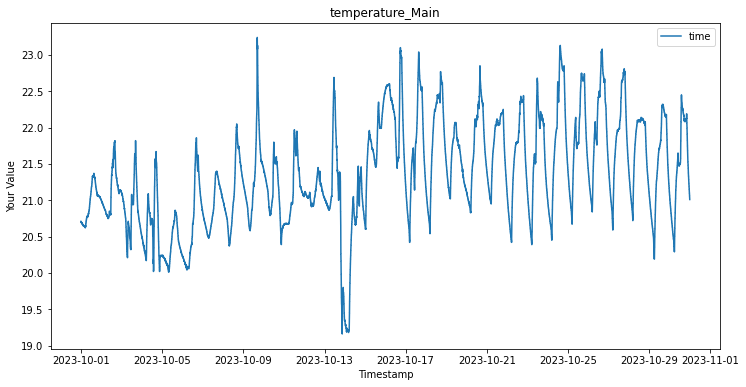

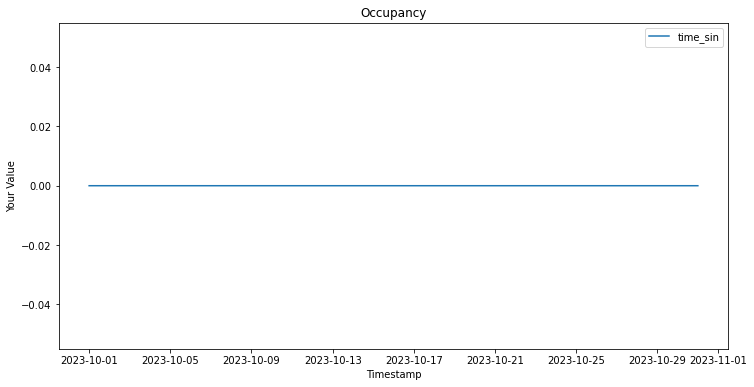

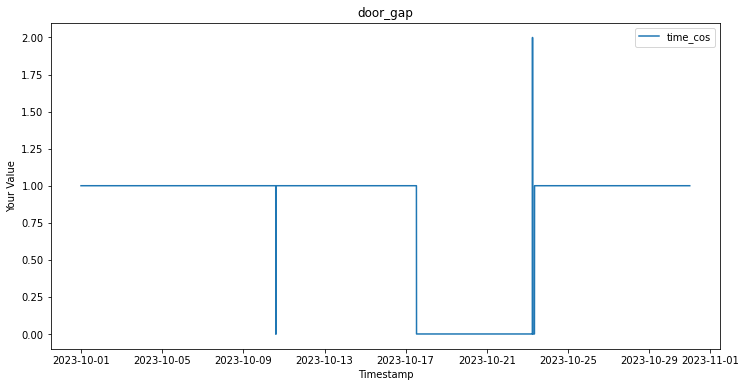

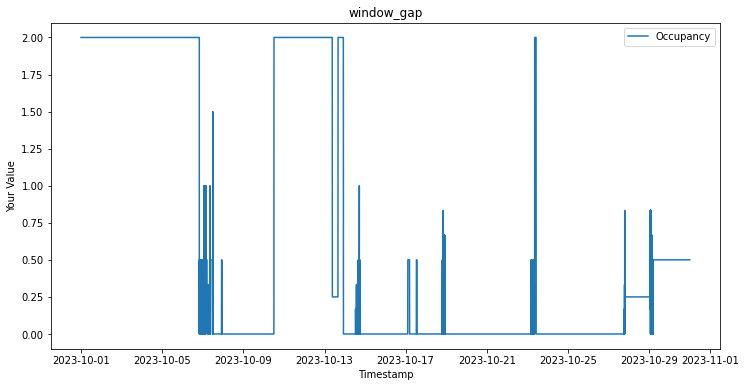

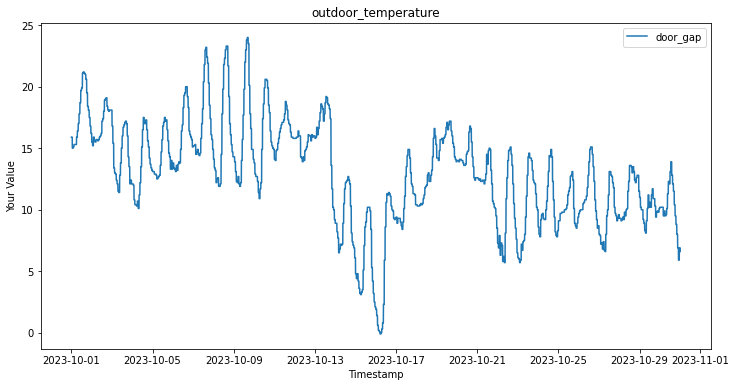

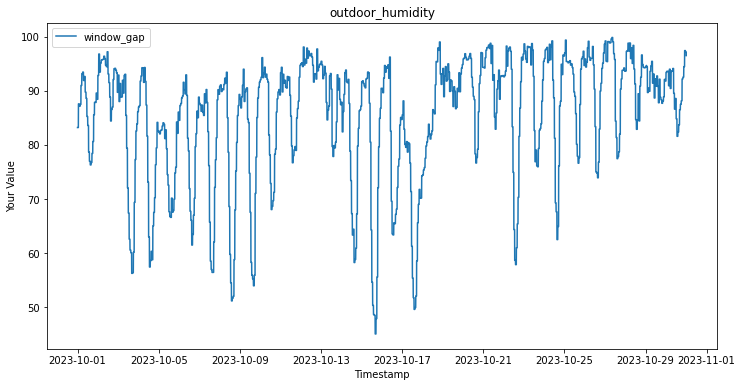

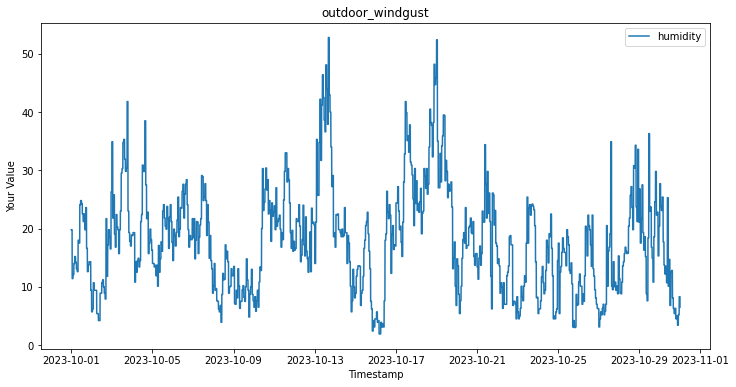

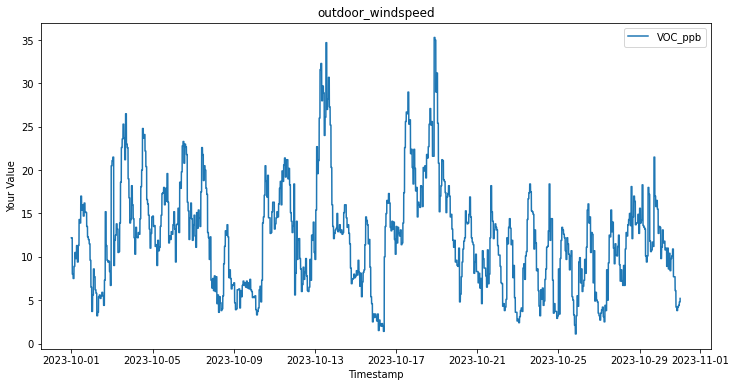

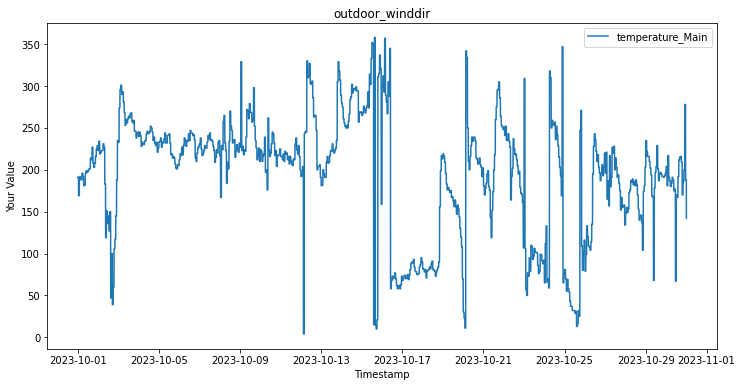

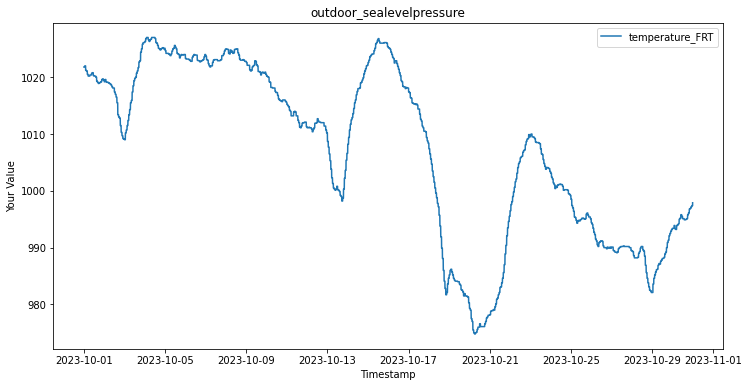

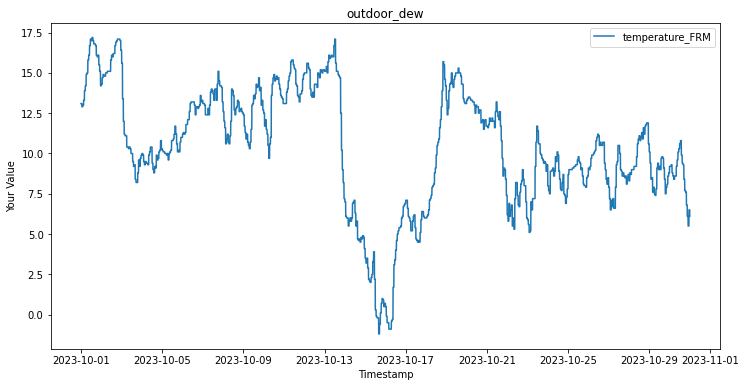

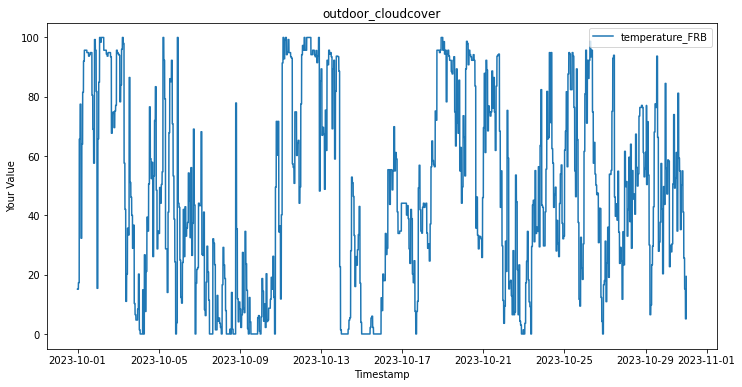

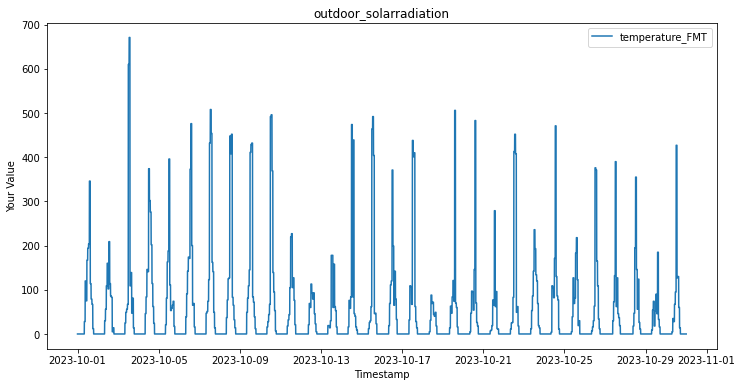

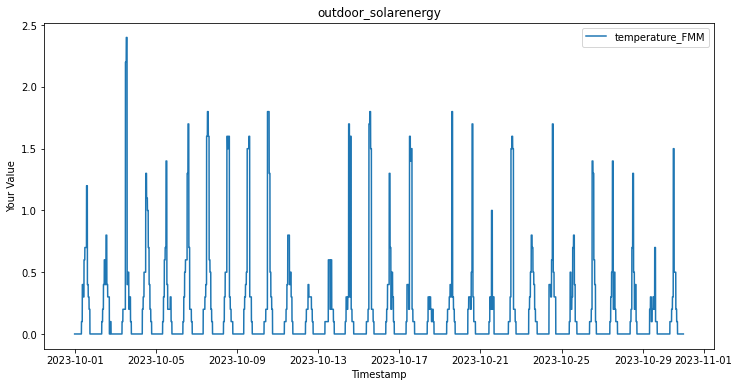

In [53]:
# Plot data over the whole time period
specific_date = pd.to_datetime('2023-10-01')
specific_date1 = pd.to_datetime('2023-10-31')

data_after_specific_date = train_1[(train_1['time'] >= specific_date) & (train_1['time'] <= specific_date1)]

columns_to_select = ["temperature_Main", "Occupancy", "door_gap", "window_gap"] + list(train_1.columns[71:])
data_after_specific_date_selected = data_after_specific_date[columns_to_select]


# data_after_specific_date_selected = data_after_specific_date_selected.dropna(axis=1)
print(data_after_specific_date_selected.shape)


for i in range(data_after_specific_date_selected.shape[1]):
    plt.figure(figsize=(12, 6))
    plt.plot(data_after_specific_date['time'], data_after_specific_date_selected.iloc[:,i], label=column_names_list[i])
    plt.xlabel('Timestamp')
    plt.ylabel('Your Value')
    plt.title(data_after_specific_date_selected.columns[i])
    plt.legend()
    plt.show()

In [54]:
print(data_after_specific_date_selected.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44180 entries, 153046 to 197225
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temperature_Main          44180 non-null  float64
 1   Occupancy                 44180 non-null  float64
 2   door_gap                  44180 non-null  float64
 3   window_gap                44180 non-null  float64
 4   outdoor_temperature       44180 non-null  float64
 5   outdoor_humidity          44180 non-null  float64
 6   outdoor_windgust          44180 non-null  float64
 7   outdoor_windspeed         44180 non-null  float64
 8   outdoor_winddir           44180 non-null  float64
 9   outdoor_sealevelpressure  44180 non-null  float64
 10  outdoor_dew               44180 non-null  float64
 11  outdoor_cloudcover        44180 non-null  float64
 12  outdoor_solarradiation    44180 non-null  float64
 13  outdoor_solarenergy       44180 non-null  float64
dtype

In [55]:
unseen_test_data = data_after_specific_date_selected.iloc[40000:, :]   # unseen_test_data
print(unseen_test_data.shape)

(4180, 14)


In [56]:
data_after_specific_date_selected = data_after_specific_date_selected.iloc[:40000, :]

## Building Model

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on: {device}")

# Drop the target column and convert the remaining data to PyTorch tensors
X = data_after_specific_date_selected.drop(columns=["temperature_Main"]).values
y = data_after_specific_date_selected["temperature_Main"].values

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Convert data to PyTorch tensors and move to GPU
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1).to(device)
X_val_tensor = torch.FloatTensor(X_val).to(device)
y_val_tensor = torch.FloatTensor(y_val).view(-1, 1).to(device)

# Specify the input size
input_size = X_train.shape[1]

# Define the neural network model and move to GPU
class TemperaturePredictionModel(nn.Module):
    def __init__(self, input_size):
        super(TemperaturePredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)  # Output layer with one neuron for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = TemperaturePredictionModel(input_size).to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 500
batch_size = 32

for epoch in range(num_epochs):
    # Mini-batch training
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation loss
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')




Running on: cuda
Epoch [1/50], Training Loss: 6.8440, Validation Loss: 4.7646
Epoch [2/50], Training Loss: 2.7301, Validation Loss: 1.4129
Epoch [3/50], Training Loss: 1.0720, Validation Loss: 0.6017
Epoch [4/50], Training Loss: 0.4481, Validation Loss: 0.3343
Epoch [5/50], Training Loss: 0.2448, Validation Loss: 0.2348
Epoch [6/50], Training Loss: 0.1719, Validation Loss: 0.1912
Epoch [7/50], Training Loss: 0.1412, Validation Loss: 0.1736
Epoch [8/50], Training Loss: 0.1174, Validation Loss: 0.1630
Epoch [9/50], Training Loss: 0.1027, Validation Loss: 0.1528
Epoch [10/50], Training Loss: 0.0949, Validation Loss: 0.1460
Epoch [11/50], Training Loss: 0.0911, Validation Loss: 0.1419
Epoch [12/50], Training Loss: 0.0890, Validation Loss: 0.1386
Epoch [13/50], Training Loss: 0.0850, Validation Loss: 0.1353
Epoch [14/50], Training Loss: 0.0827, Validation Loss: 0.1320
Epoch [15/50], Training Loss: 0.0805, Validation Loss: 0.1298
Epoch [16/50], Training Loss: 0.0787, Validation Loss: 0.1282


In [21]:
# Save the trained model
torch.save(model.state_dict(), '/home/dg321/gitTest/PRI/irp/Ventilation/23-11/models/temperature_prediction_model2.pth')

## Load saved model

In [57]:
# Define the neural network model and move to GPU
class TemperaturePredictionModel(nn.Module):
    def __init__(self, input_size):
        super(TemperaturePredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)  # Output layer with one neuron for regression

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

num_epochs = 1000
# Instantiate the model with the same architecture
model = TemperaturePredictionModel(input_size).to(device)

# Load the trained weights
model.load_state_dict(torch.load('/home/dg321/gitTest/PRI/irp/Ventilation/23-11/models/temperature_prediction_model_epoch{}.pth'.format(num_epochs)))

# Set the model to evaluation mode
model.eval()



TemperaturePredictionModel(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

## Predict

### on test

In [ ]:
X_test = unseen_test_data.drop(columns=["temperature_Main"]).values
y_test = unseen_test_data["temperature_Main"].values

In [ ]:
X_test = scaler.transform(X_test)

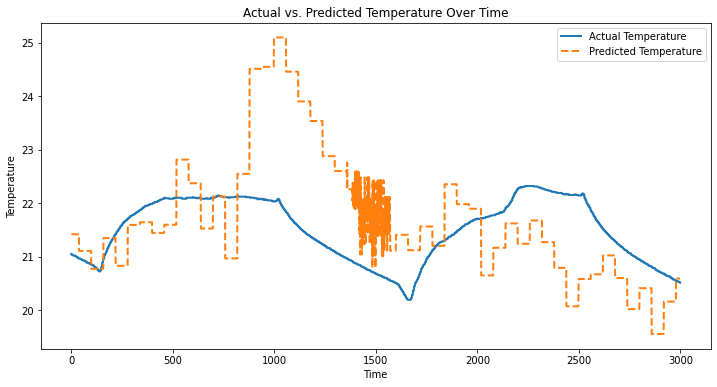

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Convert test data to PyTorch tensor and move to GPU
X_test_tensor = torch.FloatTensor(X_test).to(device)

# Set the model to etestuation mode
model.eval()

# Make predictions on the test set
with torch.no_grad():
    predictions = model(X_test_tensor).cpu().numpy()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual temperature
plt.plot(y_test[:3000], label='Actual Temperature', linewidth=2)

# Plot predicted temperature
plt.plot(predictions[:3000], label='Predicted Temperature', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature Over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

### on train

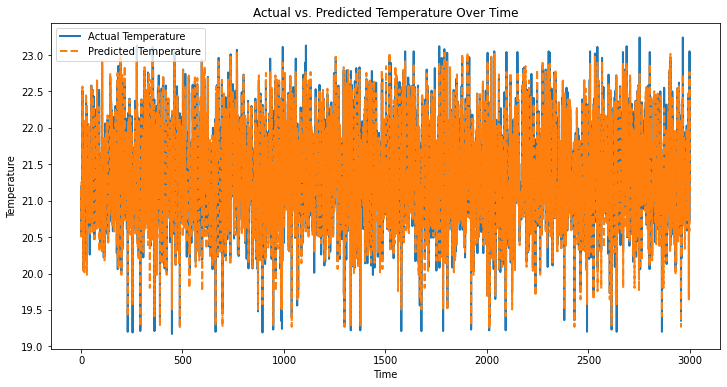

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Convert train data to PyTorch tensor and move to GPU
X_train_tensor = torch.FloatTensor(X_train).to(device)

# Set the model to etrainuation mode
model.eval()

# Make predictions on the train set
with torch.no_grad():
    predictions = model(X_train_tensor).cpu().numpy()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual temperature
plt.plot(y_train[:3000], label='Actual Temperature', linewidth=2)

# Plot predicted temperature
plt.plot(predictions[:3000], label='Predicted Temperature', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature Over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

### on val

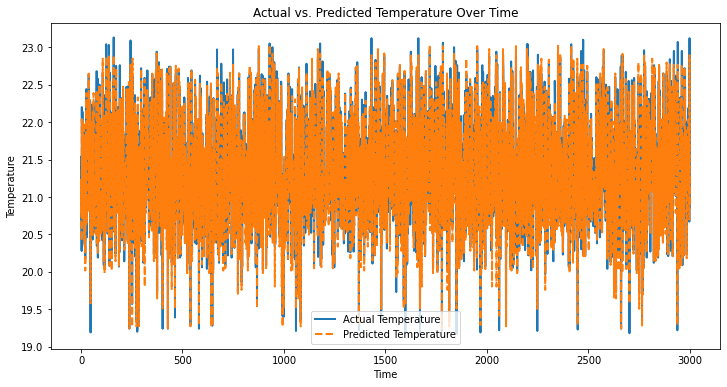

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Convert val data to PyTorch tensor and move to GPU
X_val_tensor = torch.FloatTensor(X_val).to(device)

# Set the model to evaluation mode
model.eval()

# Make predictions on the val set
with torch.no_grad():
    predictions = model(X_val_tensor).cpu().numpy()

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual temperature
plt.plot(y_val[:3000], label='Actual Temperature', linewidth=2)

# Plot predicted temperature
plt.plot(predictions[:3000], label='Predicted Temperature', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature Over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()